In [76]:
import pandas as pd 
import numpy as np
from  urllib import parse
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [77]:
df = pd.read_json("../Data - Project/quotes-2020-us.json.bz2", lines = True, compression='bz2')

In [78]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-03-19-002801,All immigration to the US should be halted due...,Laura Ingraham,[Q266863],2020-03-19 19:42:07,2,"[[Laura Ingraham, 0.7681], [None, 0.2254], [Me...",[https://www.lifezette.com/2020/03/laura-ingra...,E
1,2020-01-03-006209,"At the direction of the President, the U.S. mi...",Qasem Soleimani,[Q892014],2020-01-03 19:38:54,1,"[[Qasem Soleimani, 0.6097], [None, 0.368], [Ma...",[http://www.breitbart.com/politics/2020/01/03/...,E
2,2020-03-09-006179,"Australians have always liked close, high-spee...",None,[],2020-03-09 23:00:00,1,"[[None, 0.9157], [Albert Park, 0.0843]]",[http://goulburnpost.com.au/story/6670037/will...,E
3,2020-02-05-010601,"best week [ US President ] Trump has had, poli...",Greg Sheridan,[Q5606248],2020-02-05 08:31:35,1,"[[Greg Sheridan, 0.8975], [None, 0.1025]]",[http://www.skynews.com.au/details/_6129694652...,E
4,2020-01-29-019304,"Even if it's all true, exactly in the worst-ca...",Kevin Cramer,[Q3957020],2020-01-29 01:01:16,1,"[[Kevin Cramer, 0.8789], [None, 0.1072], [John...",[https://www.washingtonexaminer.com/opinion/go...,E


### Isolating the websites  

In [79]:
s = df.apply(lambda x: pd.Series(x['urls']),axis=1).stack().reset_index(level=1, drop=True)

In [80]:
merge = df.merge(s.to_frame(), left_index=True, right_index=True)


In [81]:
merge.drop("urls", axis = 1, inplace = True)
merge.rename(columns={0:'url'}, inplace=True)


In [82]:
merge["media"] = merge["url"].apply(lambda x : "{url.netloc}".format(url = parse.urlparse(x)))

In [83]:
merge.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,phase,url,media
0,2020-03-19-002801,All immigration to the US should be halted due...,Laura Ingraham,[Q266863],2020-03-19 19:42:07,2,"[[Laura Ingraham, 0.7681], [None, 0.2254], [Me...",E,https://www.lifezette.com/2020/03/laura-ingrah...,www.lifezette.com
0,2020-03-19-002801,All immigration to the US should be halted due...,Laura Ingraham,[Q266863],2020-03-19 19:42:07,2,"[[Laura Ingraham, 0.7681], [None, 0.2254], [Me...",E,https://www.washingtonexaminer.com/news/fox-ne...,www.washingtonexaminer.com
1,2020-01-03-006209,"At the direction of the President, the U.S. mi...",Qasem Soleimani,[Q892014],2020-01-03 19:38:54,1,"[[Qasem Soleimani, 0.6097], [None, 0.368], [Ma...",E,http://www.breitbart.com/politics/2020/01/03/m...,www.breitbart.com
2,2020-03-09-006179,"Australians have always liked close, high-spee...",None,[],2020-03-09 23:00:00,1,"[[None, 0.9157], [Albert Park, 0.0843]]",E,http://goulburnpost.com.au/story/6670037/willm...,goulburnpost.com.au
3,2020-02-05-010601,"best week [ US President ] Trump has had, poli...",Greg Sheridan,[Q5606248],2020-02-05 08:31:35,1,"[[Greg Sheridan, 0.8975], [None, 0.1025]]",E,http://www.skynews.com.au/details/_6129694652001,www.skynews.com.au


### Analysing the medias  

In [84]:
merge.media.nunique() 

5517

There are 5517 different medias. This is a lot, it could be interesting to look at the most common ones

In [85]:
medias = merge.groupby("media").size()

In [86]:
medias = medias.sort_values(ascending = False)

medias.head(30)

media
uspolitics.einnews.com        6364
www.news965.com               2622
www.breitbart.com             2353
www.msn.com                   2315
www.wokv.com                  2269
brazilbusiness.einnews.com    1668
msn.com                       1447
www.timesofisrael.com         1380
tass.com                      1333
www.washingtontimes.com       1246
www.wsbradio.com              1199
www.rawstory.com              1153
www.washingtonexaminer.com    1075
hypervocal.com                1072
thehill.com                   1051
www.nbcnews.com               1042
feeds.cbsnews.com              985
newsok.com                     981
www.foxnews.com                965
wtmj.com                       944
kvia.com                       942
www.krmg.com                   907
www.deccanherald.com           850
www.nytimes.com                848
www.nhregister.com             804
www.theepochtimes.com          777
abc17news.com                  763
www.thehour.com                753
stamfordadvoca

Look at the 30 most common ones

In [87]:
merge = merge[merge["media"].isin(medias.nlargest(30).index)]
len(merge)

41602

In [88]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [89]:
sia = SentimentIntensityAnalyzer()
# predict the sentiment of each quotation in the range [-1, 1]
merge["sentiment"] = merge.quotation.apply(lambda x: sia.polarity_scores(x)["compound"])
merge.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,phase,url,media,sentiment
763,2020-01-05-036554,These Media Posts will serve as notification t...,President Donald Trump,[Q22686],2020-01-05 00:00:00,439,"[[President Donald Trump, 0.6426], [Donald Tru...",E,https://www.rawstory.com/2020/01/youre-not-a-d...,www.rawstory.com,0.5574
8185,2020-03-24-091456,"While we understand the desire for optimism, w...",Matthew Harrison,"[Q1909480, Q3299727, Q58149679]",2020-03-24 12:25:00,58,"[[Matthew Harrison, 0.9321], [None, 0.0679]]",E,https://www.news965.com/news/trending/jamie-le...,www.news965.com,0.7351
5878,2020-02-22-002970,askedthem to identify political appointees acr...,None,[],2020-02-22 18:20:41,95,"[[None, 0.352], [Jonathan Swan, 0.2642], [John...",E,http://uspolitics.einnews.com/article/51033690...,uspolitics.einnews.com,0.0000
53744,2020-04-06-044497,The lack of immune protection or an existing c...,Peter Navarro,[Q7176052],2020-04-06 20:33:01,171,"[[Peter Navarro, 0.432], [None, 0.4311], [Pres...",E,https://www.krmg.com/news/national/bobcat-hit-...,www.krmg.com,-0.4019
35649,2020-02-22-007649,fully sanitized by a cleaning company with an ...,None,[],2020-02-22 09:56:00,575,"[[None, 0.7698], [Lupita Nyong ' o, 0.1527], [...",E,https://www.news965.com/news/local/task-force-...,www.news965.com,0.0000


In [90]:
media_sentiment = merge.groupby("media")["sentiment"].mean()
media_sentiment

media
abc17news.com                 0.192343
brazilbusiness.einnews.com    0.428117
feeds.cbsnews.com             0.096391
hypervocal.com                0.183183
kvia.com                      0.218628
msn.com                       0.133030
newsok.com                    0.288327
stamfordadvocate.com          0.219337
tass.com                      0.157565
thehill.com                   0.191477
uspolitics.einnews.com        0.204984
wtmj.com                      0.181558
www.breitbart.com             0.141898
www.businessinsider.in        0.069093
www.deccanherald.com          0.189604
www.foxnews.com               0.165424
www.krmg.com                 -0.078214
www.msn.com                   0.167281
www.nbcnews.com               0.177351
www.news965.com               0.144127
www.nhregister.com            0.211891
www.nytimes.com               0.248611
www.rawstory.com              0.022956
www.theepochtimes.com         0.211616
www.thehour.com               0.228437
www.timesofisrael.c

Text(0.5, 1.0, 'Mean sentiment analysis per media')

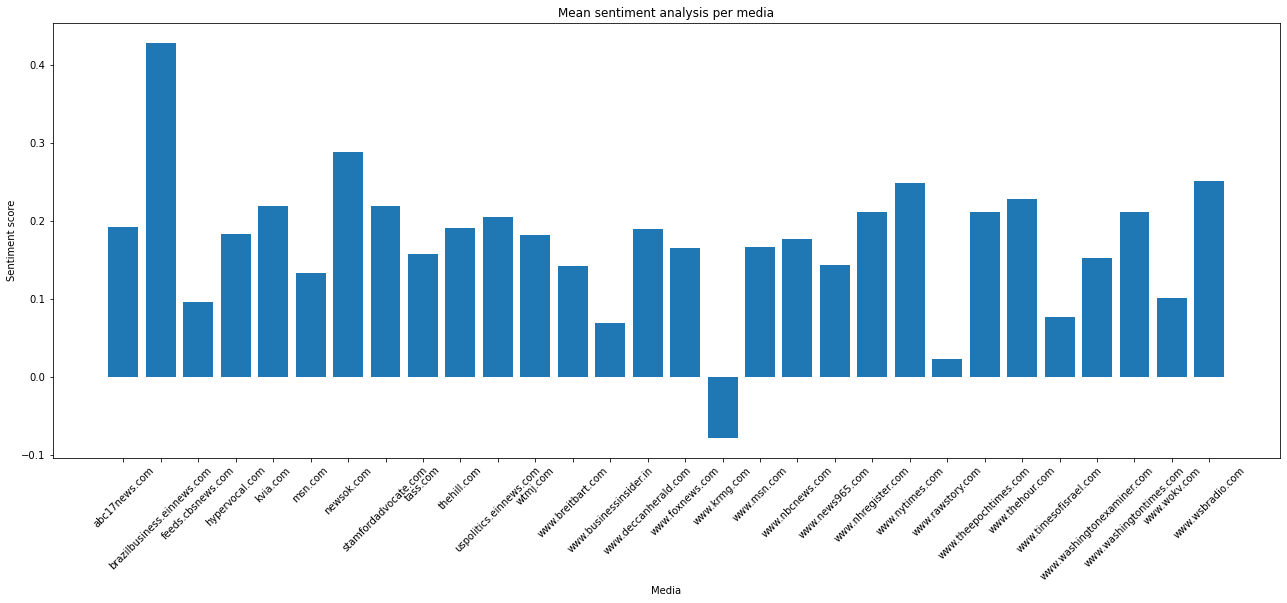

In [107]:
fig_dims = (22, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
plt.bar(media_sentiment.index, media_sentiment)
plt.xlabel("Media")
plt.ylabel("Sentiment score")
plt.title("Mean sentiment analysis per media")

Most seem to be between 0.2 and 0.4, but seems to be some extreme values. Interesting to compare their distributions

In [92]:
einews = merge[merge["media"] == "brazilbusiness.einnews.com"]
wokv = merge[merge["media"] == "www.wokv.com"]

#Perform a p-value on the t-test to see if the two sample come from the same distribution
_, p_value = ttest_ind(einews.sentiment,wokv.sentiment,
                alternative='two-sided')

print("P value is : {}".format(p_value))
if p_value < 0.05:
    print("P value is less than the threshold.\nIt rejects the null hypothesis that the samples have the same means.")
else:
    print("P value is more than the threshold.\nWe cannot reject the null hypothesis.")

P value is : 1.6059168006604505e-100
P value is less than the threshold.
It rejects the null hypothesis that the samples have the same means.


As the null hypothesis is rejected, there seems to be clear differences in some of the disributions 

<AxesSubplot:title={'center':'Sentiment score distribution for different medias'}, xlabel='media', ylabel='sentiment'>

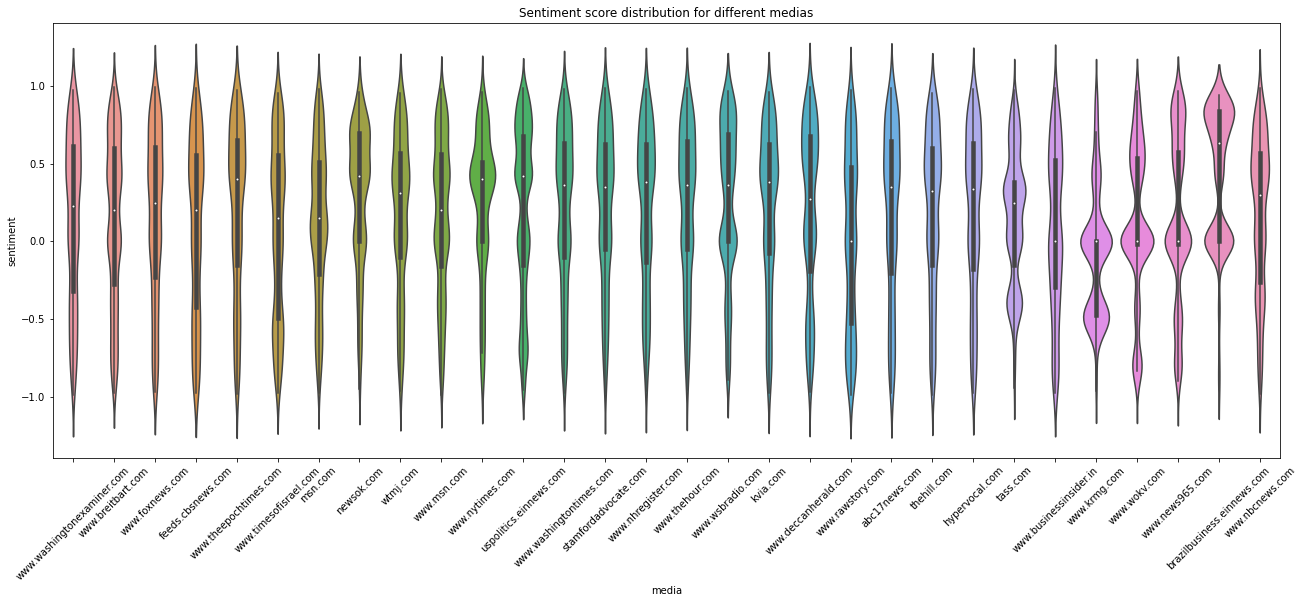

In [108]:
fig_dims = (22, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
plt.title("Sentiment score distribution for different medias")
sns.violinplot(x="media", y="sentiment", data=merge, ax = ax, fig = fig)

Interesting, but how does this relates to the different country - Interesting to look at the amount of countries per media

### Countries per media 

In [94]:
speaker_df = pd.read_parquet("../Data - Project/speaker_attributes.parquet")
speaker_df = speaker_df[['id', 'nationality']]
speaker_df.head()

,id,nationality
0,Q23,"[Q161885, Q30]"
1,Q42,[Q145]
2,Q1868,[Q31]
3,Q207,[Q30]
4,Q297,[Q29]


In [95]:
no_none = merge[merge["speaker"] != "None"]

In [96]:
no_none["speaker_id"] = no_none.qids.map(lambda x: x[0])

#join US_data with the corresponding speakers' attributes
nn_merge = pd.merge(no_none, speaker_df, left_on=['speaker_id'], right_on=['id'], how='inner')
nn_merge.sample(n=5)

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,phase,url,media,sentiment,speaker_id,id,nationality
20201,2020-02-01-060236,We've informed the Israeli side... that there ...,Mahmoud Abbas,"[Q10515624, Q127998, Q45193693]",2020-02-01 05:00:00,50,"[[Mahmoud Abbas, 0.6789], [None, 0.2329], [Ben...",E,https://www.rawstory.com/2020/02/palestinians-...,www.rawstory.com,0.4588,Q10515624,Q10515624,[Q801]
6683,2020-01-21-080434,The work that we've done over these past month...,Mike Pompeo,[Q473239],2020-01-21 00:37:45,2,"[[Mike Pompeo, 0.9319], [None, 0.0614], [Nicol...",E,http://www.breitbart.com/news/pompeo-reiterate...,www.breitbart.com,0.6705,Q473239,Q473239,[Q30]
13525,2020-04-06-049116,"These numbers are alarming, but firefighters a...","Camilla , Duchess of Cornwall",[Q152239],2020-04-06 08:47:00,123,"[[Camilla , Duchess of Cornwall, 0.5948], [Non...",E,https://www.wsbradio.com/news/national/pennsyl...,www.wsbradio.com,0.5346,Q152239,Q152239,[Q145]
14224,2020-03-11-002460,"Alarmingly, the president did not say how the ...",Charles Schumer,[Q380900],2020-03-11 15:06:17,191,"[[Charles Schumer, 0.4737], [Nancy Pelosi, 0.3...",E,https://www.krmg.com/weather/fox23-thursday-ov...,www.krmg.com,-0.4767,Q380900,Q380900,[Q30]
19677,2020-01-25-011150,has shown himself to be the most pro-Israel pr...,John Hagee,[Q861718],2020-01-25 00:00:00,43,"[[John Hagee, 0.8318], [None, 0.1033], [Presid...",E,http://www.thehour.com/news/article/Politics-w...,www.thehour.com,0.5809,Q861718,Q861718,[Q30]


In [100]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

#sparkql query to get the country name and their respective quids from wikidata
query = """#List of present-day countries and capital(s)
SELECT DISTINCT ?country ?countryLabel
WHERE
{
  ?country wdt:P31 wd:Q3624078 .

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?countryLabel"""

'''
query internet dataset:
endpoint_url (string): url of corresponding dataset
query (string): sparksql query
'''
def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

#Build a country dictionnary {quid, country name}
country_dict = {}
for result in results["results"]["bindings"]:
    country_id = result["country"]['value'].split('/')[-1]
    country_dict[country_id] = result["countryLabel"]['value']

In [101]:
# Add nationality of speaker from the country dictionnary
merg_nation = nn_merge.explode('nationality')
merg_nation.nationality = merg_nation.nationality.map(country_dict)
merg_nation.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,phase,url,media,sentiment,speaker_id,id,nationality
18961,2020-02-16-011186,He thought it was -- so he thought it was very...,Arsen Avakov,"[Q2471745, Q704389]",2020-02-16 12:06:00,8,"[[Arsen Avakov, 0.5546], [None, 0.3762], [Rudy...",E,https://www.nbcnews.com/politics/trump-impeach...,www.nbcnews.com,-0.6232,Q2471745,Q2471745,Russia
7104,2020-01-08-076772,The United States will continue to follow this...,Mike Pompeo,[Q473239],2020-01-08 17:46:00,379,"[[Mike Pompeo, 0.6815], [None, 0.3179], [`` Th...",E,https://www.news965.com/news/video-hundreds-ce...,www.news965.com,0.5719,Q473239,Q473239,United States of America
23879,2020-01-03-061712,The US and Iran have been engaged in a dangero...,Abu Bakr al-Baghdadi,[Q2821724],2020-01-03 07:40:04,7,"[[Abu Bakr al-Baghdadi, 0.3857], [None, 0.3071...",E,https://kvia.com/news/us-world/2020/01/03/us-s...,kvia.com,-0.0516,Q2821724,Q2821724,NaN
11111,2020-02-22-017122,implausibly alleges that the submission of thr...,Devin Nunes,[Q539493],2020-02-22 21:21:47,1,"[[Devin Nunes, 0.6301], [None, 0.3699]]",E,https://www.washingtonexaminer.com/news/devin-...,www.washingtonexaminer.com,-0.7269,Q539493,Q539493,United States of America
3455,2020-02-04-076173,Thanks to our bold regulatory reduction campai...,President Donald Trump,[Q22686],2020-02-04 00:00:00,129,"[[President Donald Trump, 0.7151], [None, 0.17...",E,http://www.nhregister.com/news/crime/article/A...,www.nhregister.com,0.8779,Q22686,Q22686,United States of America


In [102]:
merg_nation.groupby("media")["nationality"].nunique()

media
abc17news.com                 23
brazilbusiness.einnews.com     6
feeds.cbsnews.com             16
hypervocal.com                23
kvia.com                      41
msn.com                       48
newsok.com                    27
stamfordadvocate.com          34
tass.com                      22
thehill.com                   28
uspolitics.einnews.com        16
wtmj.com                      37
www.breitbart.com             59
www.businessinsider.in        19
www.deccanherald.com          24
www.foxnews.com               26
www.krmg.com                  14
www.msn.com                   51
www.nbcnews.com               26
www.news965.com               15
www.nhregister.com            39
www.nytimes.com               28
www.rawstory.com              22
www.theepochtimes.com         27
www.thehour.com               38
www.timesofisrael.com         23
www.washingtonexaminer.com    28
www.washingtontimes.com       46
www.wokv.com                  19
www.wsbradio.com              16
Name

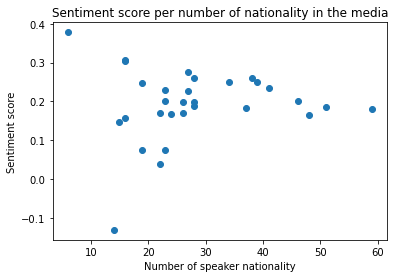

In [109]:
plt.title("Sentiment score per number of nationality in the media")
plt.ylabel("Sentiment score")
plt.xlabel("Number of speaker nationality")
plt.scatter(merg_nation.groupby("media")["nationality"].nunique(),merg_nation.groupby("media")["sentiment"].mean())

Extreme values come from low number of countries 